### The suicide rate in different countries has been quite high in both devloped and devloping countries we will analyze and answer the following questions:

1. How suicide rates has been affected by sex? what is the trend between the year (1985 - 2016)?
2. what age group of people has been most affectd by suicide?
3. What percent of population is affected by suicide based on the age group?  what is the trend between the year (1985-2016)
4. which generation has been the most affected by suicide ?
5. Which country has the Avg. highest suicide rate ?
6. The trend of the suicide rate of top 10 countries over the years (1985-2016) ?
7. The trend of GDP per capita of top 10 countries over the years (1985-2016) ?
8. The affect of GDP per capita on suicides rate.

In [1]:
#Importing Required modules 
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
cd C:\Users\SRIMON\Documents\Python Directory

C:\Users\SRIMON\Documents\Python Directory


In [3]:
df_suicide = pd.read_csv('master.csv')

In [4]:
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# find the missing values in percentage
for col in df_suicide.columns:
    pct_missing = np.mean(df_suicide[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

country - 0.0%
year - 0.0%
sex - 0.0%
age - 0.0%
suicides_no - 0.0%
population - 0.0%
suicides/100k pop - 0.0%
country-year - 0.0%
HDI for year - 0.699352983465133%
 gdp_for_year ($)  - 0.0%
gdp_per_capita ($) - 0.0%
generation - 0.0%


In [6]:
#checking for the numbers of null values 
df_suicide.isnull().sum() 

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Filling the null values in Human Devlopment Index (HDI) with 0.

In [7]:
df_suicide['HDI for year'] = df_suicide['HDI for year'].fillna(0)

In [8]:
df_suicide.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [9]:
# Renaming the columns 
df_suicide.rename(columns = {' gdp_for_year ($) ':'GDP_year'}, inplace = True)
df_suicide.rename(columns = {'gdp_per_capita ($)':'GDP_capita'}, inplace = True)

In [10]:
#Checkig for column if they have been renamed or not
df_suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'GDP_year',
       'GDP_capita', 'generation'],
      dtype='object')

[Text(0.5, 1.0, 'Gender based suicide no. over the years')]

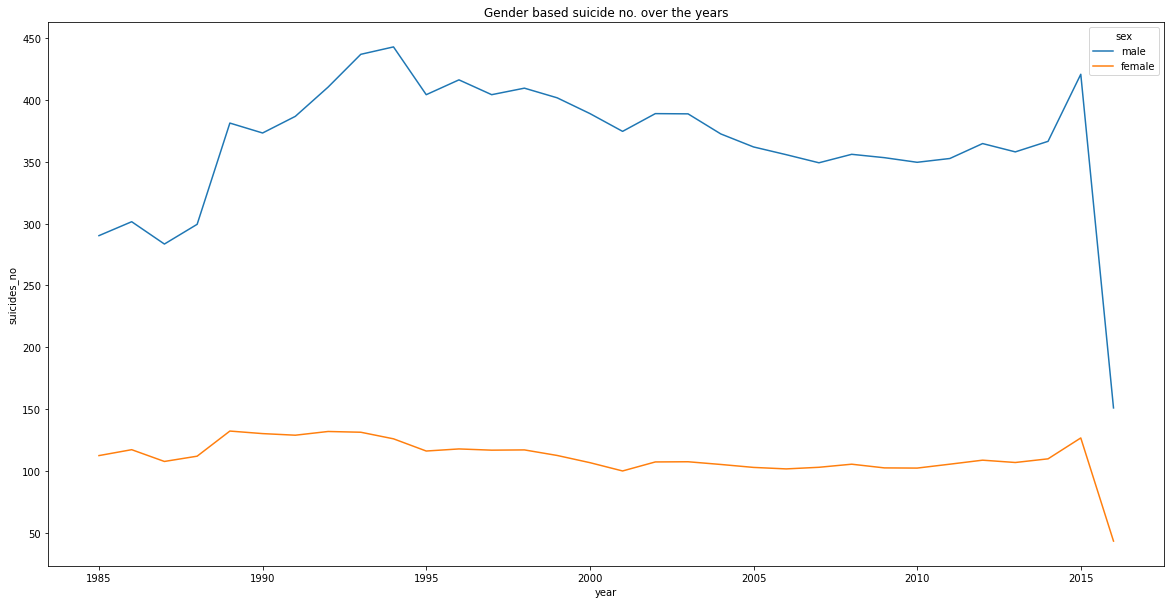

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = df_suicide, x = 'year', y = 'suicides_no', hue = 'sex', ci = None ).set(title = 'Gender based suicide no. over the years')

### From the above plot we can see that no matter what year it is the suicide nos. of male has been 3 times higher than the females.

[Text(0.5, 1.0, 'Global Suicide Nos.')]

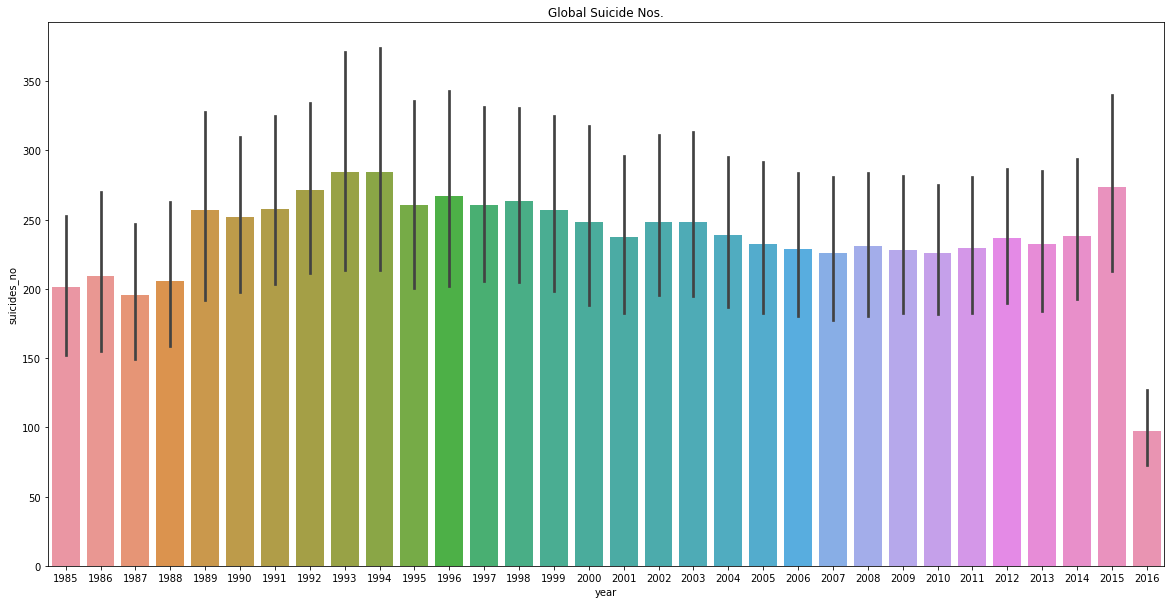

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data = df_suicide, x = 'year', y = 'suicides_no' ).set(title = 'Global Suicide Nos.')

### The above plot shows that in between 1989 to 1994 the suicie nos. has been the highest, now we have to go deeper into this which generation and what age group has been most affected by the suicide.

In [13]:
#Changing the data type and rearranging the data 
df_suicide["GDP_year"] = df_suicide["GDP_year"].str.replace(",","").astype(np.int64)

In [14]:
# grouping by columns year and age and total sum of population based on age group 
df_age = df_suicide.groupby(["year","age"])["suicides_no", "population"].sum()
df_generation = df_suicide.groupby(["year","generation"])["suicides_no", "population"].sum()

C:\Users\SRIMON\AppData\Local\Temp/ipykernel_13484/1261432564.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df_suicide.groupby(["year","age"])["suicides_no", "population"].sum()
C:\Users\SRIMON\AppData\Local\Temp/ipykernel_13484/1261432564.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_generation = df_suicide.groupby(["year","generation"])["suicides_no", "population"].sum()


In [15]:
#Finding the percentage of population attempted suicide based on age group and generation
df_age['Percnt_age'] = df_age['suicides_no']*100/df_age['population']
df_generation['Percnt_gen'] = (df_generation['suicides_no']/df_generation['population'])*100

In [16]:
df_age

suicides_no  population  Percnt_age
year age                                             
1985 15-24 years        17870   196974439    0.009072
     25-34 years        20771   173536624    0.011969
     35-54 years        35748   246046628    0.014529
     5-14 years           984   199192522    0.000494
     55-74 years        28736   152769432    0.018810
...                       ...         ...         ...
2016 15-24 years         1195    20296338    0.005888
     25-34 years         2070    22641704    0.009142
     35-54 years         5766    47314975    0.012186
     55-74 years         4715    32084580    0.014696
     75+ years           1857     9764299    0.019018

[191 rows x 3 columns]

In [17]:
df_generation

suicides_no  population  Percnt_gen
year generation                                          
1985 Boomers                20771   173536624    0.011969
     G.I. Generation        40690   192849873    0.021099
     Generation X           18854   396166961    0.004759
     Silent                 35748   246046628    0.014529
1986 Boomers                21685   176214788    0.012306
...                           ...         ...         ...
2015 Silent                 23114   116559095    0.019830
2016 Boomers                 4715    32084580    0.014696
     Generation X            5766    47314975    0.012186
     Millenials              3265    42938042    0.007604
     Silent                  1857     9764299    0.019018

[146 rows x 3 columns]

[Text(0.5, 1.0, 'Global Percentage of population attempted suicide based on age ')]

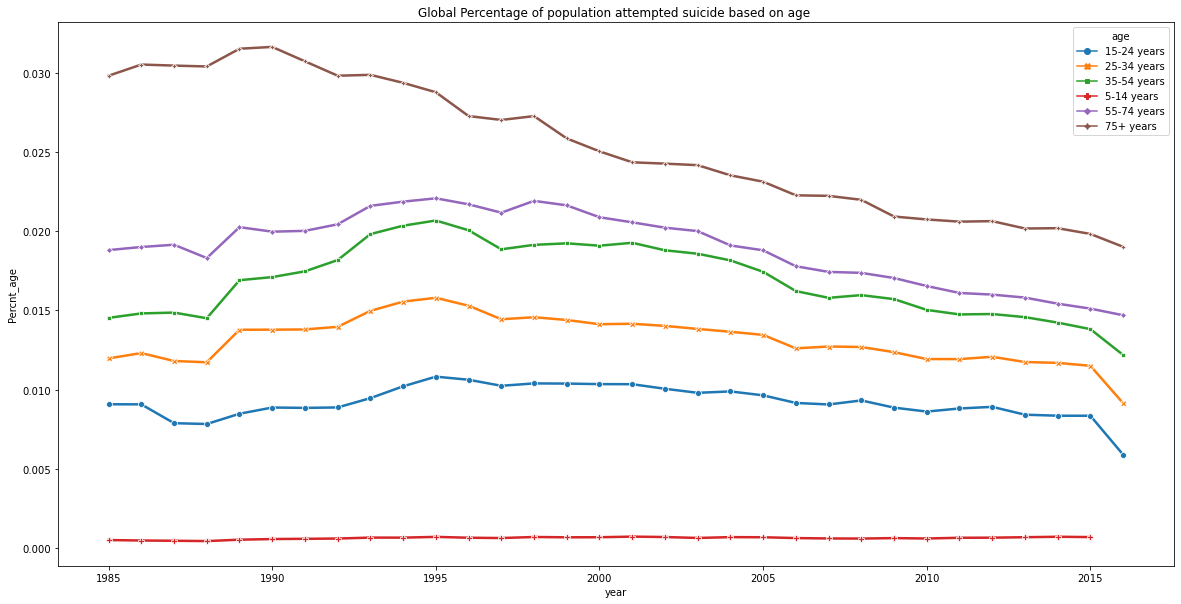

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = df_age, x = 'year', y = 'Percnt_age', hue = 'age', linewidth = 2.5, style = "age", markers=True, dashes=False).set(title = 'Global Percentage of population attempted suicide based on age ')

### From the above plot we can see that age is factor for suicide rate, the higher the age the chances of suicide increases.

[Text(0.5, 1.0, 'Global Percentage of population attempted suicide based on Generation type ')]

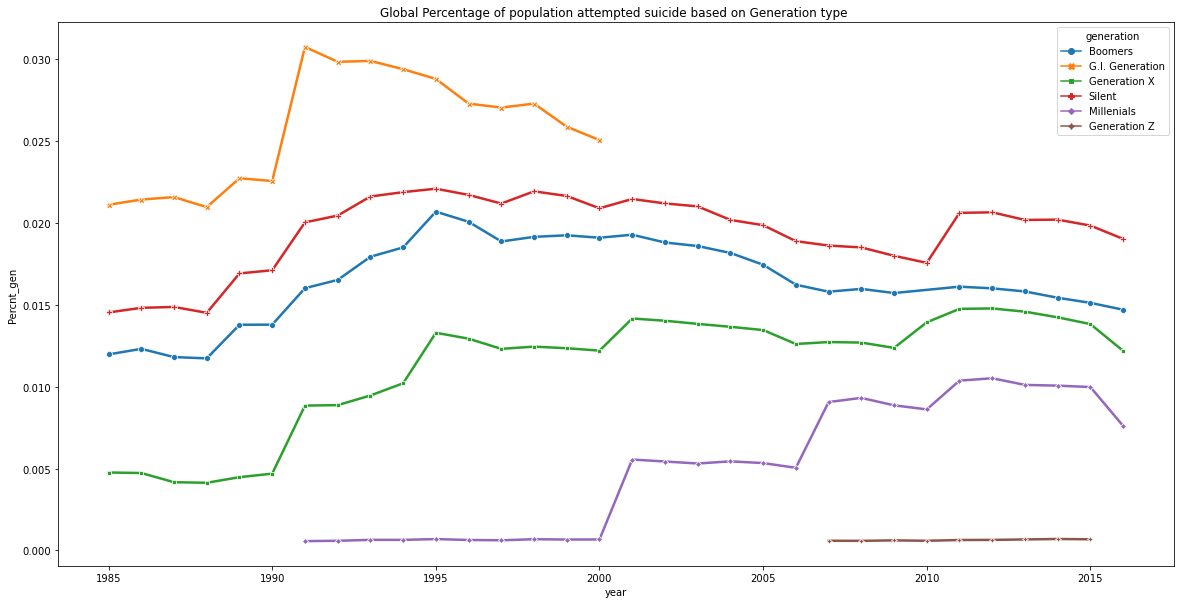

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = df_generation, x = 'year', y = 'Percnt_gen', hue = 'generation', linewidth = 2.5, style = "generation", markers=True, dashes=False).set(title = 'Global Percentage of population attempted suicide based on Generation type ')

####  From the above plot we ca see that the highest suicide rate per population has been faced by the G.I generation also know as the WW-II genration
#### The generation is generally defined as people born from 1901 to 1927 
#### Before WW-II this generation experienced profound economic and social turmoil due to world wide great depression causing the income,profit,Taxes been decreased due to severe unemployment actue deflation in almost every country in the world
#### This generation faced turmoil in the form of the Vietnam War, civil rights movement, Watergate scandal, and a generational culture clash.
#### This kind of social impact could have been an major effect on the suicide rate 


In [20]:
df_GDP = df_suicide.groupby(["country","year","GDP_year","GDP_capita"])["suicides_no","population"].sum()

C:\Users\SRIMON\AppData\Local\Temp/ipykernel_13484/3211591819.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_GDP = df_suicide.groupby(["country","year","GDP_year","GDP_capita"])["suicides_no","population"].sum()


In [21]:
df_GDP.head()

suicides_no  population
country year GDP_year   GDP_capita                         
Albania 1987 2156624900 796                  73     2709600
        1988 2126000000 769                  63     2764300
        1989 2335124988 833                  68     2803100
        1992 709452584  251                  47     2822500
        1993 1228071038 437                  73     2807300

### Finding the average suicide rate per country per year

In [42]:
df_suino = df_suicide.groupby(["country","year"])["suicides_no"].sum()
df_suino

country     year
Albania     1987      73
            1988      63
            1989      68
            1992      47
            1993      73
                    ... 
Uzbekistan  2010    1464
            2011    1640
            2012    1835
            2013    1950
            2014    2095
Name: suicides_no, Length: 2321, dtype: int64

In [23]:
df_sum = df_suino.sort_index(ascending=True)[:] * 100
df_sum

country     year
Albania     1987      7300
            1988      6300
            1989      6800
            1992      4700
            1993      7300
                     ...  
Uzbekistan  2010    146400
            2011    164000
            2012    183500
            2013    195000
            2014    209500
Name: suicides_no, Length: 2321, dtype: int64

In [24]:
df_pop = df_suicide.groupby(["country","year"]).population.sum()
df_pop

country     year
Albania     1987     2709600
            1988     2764300
            1989     2803100
            1992     2822500
            1993     2807300
                      ...   
Uzbekistan  2010    25651783
            2011    25978049
            2012    26381830
            2013    26838924
            2014    27313507
Name: population, Length: 2321, dtype: int64

In [25]:
df_pop_sum = df_pop.sort_index(ascending=False)[:]

In [26]:
df_total = df_sum / df_pop_sum

In [27]:
df_total

country     year
Albania     1987    0.002694
            1988    0.002279
            1989    0.002426
            1992    0.001665
            1993    0.002600
                      ...   
Uzbekistan  2010    0.005707
            2011    0.006313
            2012    0.006956
            2013    0.007266
            2014    0.007670
Length: 2321, dtype: float64

In [29]:
df_suiciderate = df_suicide.groupby(["country","year"])["suicides_no","population"].sum()
df_suiciderate['suicide rate per year'] = df_suiciderate['suicides_no']/df_suiciderate['population']*100
df_suiciderate.head()

C:\Users\SRIMON\AppData\Local\Temp/ipykernel_13484/2240576303.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_suiciderate = df_suicide.groupby(["country","year"])["suicides_no","population"].sum()


suicides_no  population  suicide rate per year
country year                                                
Albania 1987           73     2709600               0.002694
        1988           63     2764300               0.002279
        1989           68     2803100               0.002426
        1992           47     2822500               0.001665
        1993           73     2807300               0.002600

### Finding The Average suicide rate per country 

In [30]:
country_dict={}
for country in df_suiciderate.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

In [31]:

Average_suicide_rate = pd.DataFrame.from_dict(country_dict, orient='index',
                       columns=['Avg suicide rate'])
Average_suicide_rate

,Avg suicide rate
Albania,0.003137
Antigua and Barbuda,0.000541
Argentina,0.007911
Armenia,0.002475
Aruba,0.008097
...,...
United Arab Emirates,0.001751
United Kingdom,0.007884
United States,0.012835
Uruguay,0.015497


In [32]:
Average_suicide_rate_sorted = Average_suicide_rate.sort_values(by=['Avg suicide rate'], inplace = False, ascending = False)

In [33]:
# Finding The top  Countries with the higest suicide rate 
Average_suicide_rate_sorted.head(10)

,Avg suicide rate
Lithuania,0.040736
Russian Federation,0.032703
Sri Lanka,0.030848
Belarus,0.030231
Hungary,0.029617
Latvia,0.027995
Kazakhstan,0.027041
Slovenia,0.026416
Estonia,0.025744
Ukraine,0.024741


In [35]:
#Sorting the suicide rates in a descending order
Average_suicide_rate_sorted.reset_index(inplace = True)
Average_suicide_rate_sorted = Average_suicide_rate_sorted.rename(columns = {'index':'country'})
Average_suicide_rate_sorted

,country,Avg suicide rate
0,Lithuania,0.040736
1,Russian Federation,0.032703
2,Sri Lanka,0.030848
3,Belarus,0.030231
4,Hungary,0.029617
...,...,...
96,Antigua and Barbuda,0.000541
97,Jamaica,0.000443
98,Oman,0.000388
99,Dominica,0.000000


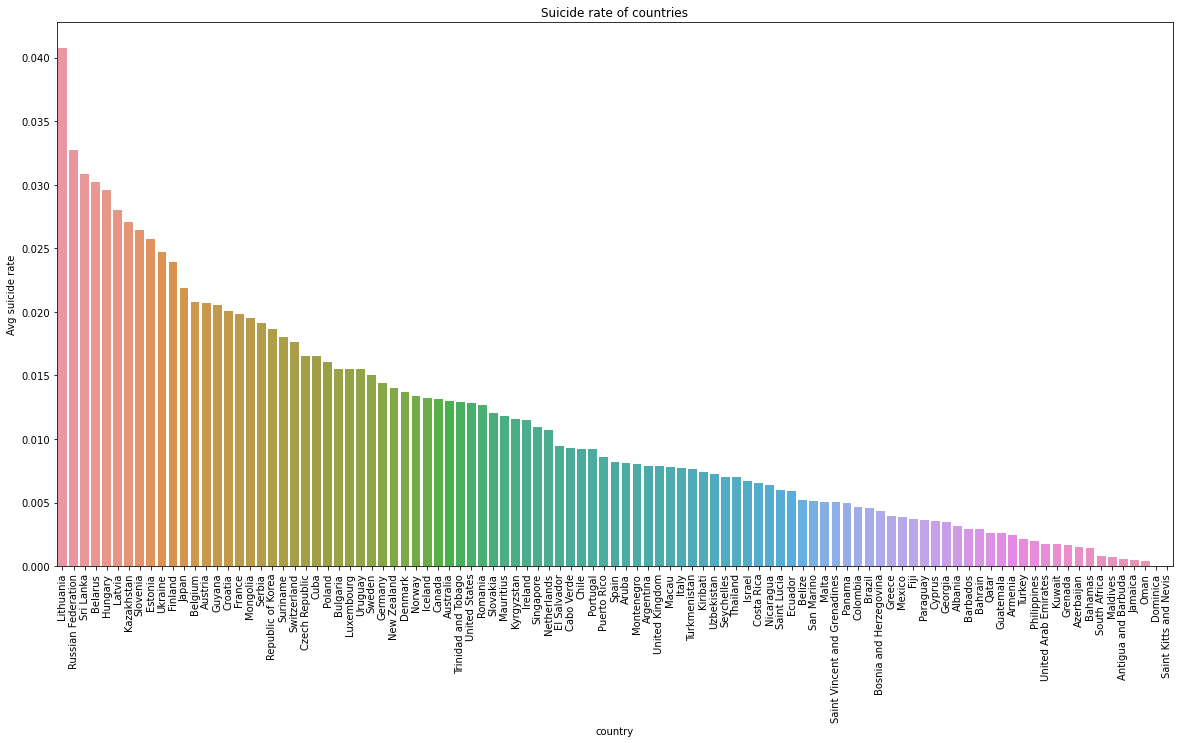

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data = Average_suicide_rate_sorted, x = 'country', y = 'Avg suicide rate').set(title = 'Suicide rate of countries')
plt.xticks(rotation = 90)
plt.show()

### As we can see from the above plot we can see the countries with Avg. suicide rates in descending order 

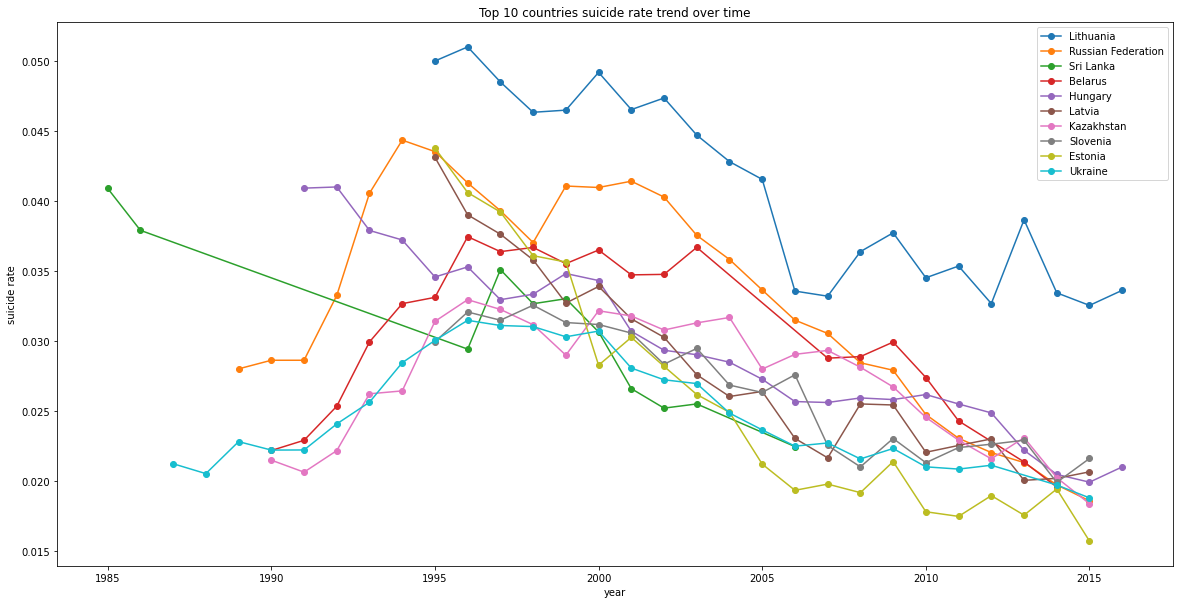

In [37]:
plt.figure(figsize = (20,10))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("suicide rate")
plt.title("Top 10 countries suicide rate trend over time")
plt.legend()
plt.show()

### Plotting the top countries with highest suicide rate and how the trend change over time
### We need to find out that is GDP is a factor for the suicide rate.

In [40]:
df_GDP_percapita = df_suicide.groupby(["country","year"]).GDP_capita.mean()
df_GDP_percapita

country     year
Albania     1987     796.0
            1988     769.0
            1989     833.0
            1992     251.0
            1993     437.0
                     ...  
Uzbekistan  2010    1533.0
            2011    1767.0
            2012    1964.0
            2013    2150.0
            2014    2309.0
Name: GDP_capita, Length: 2321, dtype: float64

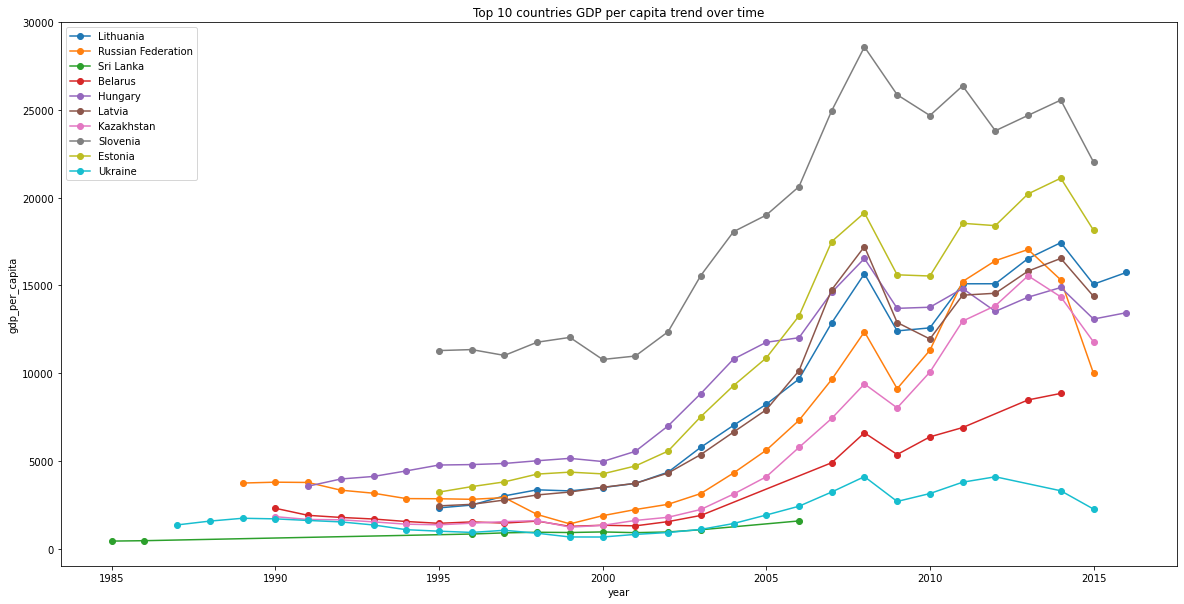

In [41]:
plt.figure(figsize = (20,10))
for country in country_list[:10]:
    plt.plot(df_GDP_percapita[country].index,df_GDP_percapita[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.title("Top 10 countries GDP per capita trend over time")
plt.legend()
plt.show()

### The above plot shows the trend of GDP over the course of time 
### The GDP of most countries has been increasing from the year 2000-2014 and the from the above plot for suicide rate we can see that the suicide rates of the countries has been started decreasing from year 2000-2014 
### For the year 2015 we can see from the plot GDP has been decreased for country like Solvenia, Lativa, Hungary, Lithuania so the suicide rates increased
### From this we can fairly conclude that the GDP and the suicide rates are highly correlated.